## <b>Chapter 3. 키워드 분석(Keyword Analysis)</b>

- 키워드란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구이다.
- 키워드 분석이란 불용어 제거와 어간추출 및 형태소 분석 등을 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출하는 것이다.   
- 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초한다.  
- 물론, 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋다.
- 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있다.

### 1. 데이터 전처리

##### ① 데이터셋 파일 읽기
- 네이버 영화 리뷰 데이터 https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [1]:
f = open('data_set/ratings.txt', 'r', encoding='utf-8') #cp949, euc-kr
raw = f.readlines()
print(raw[:3])

['id\tdocument\tlabel\n', '8112052\t어릴때보고 지금다시봐도 재밌어요ㅋㅋ\t1\n', '8132799\t디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.\t1\n']


In [4]:
raw[3].split('\t')[1]

'폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.'

##### ② 리뷰 데이터만 추출

In [10]:
reviews = []

for i in raw:
    reviews.append(i.split('\t')[1])

print(reviews[:5])

['document', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지']


- 'document' 제외

In [11]:
reviews = reviews[1:]
reviews

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
 '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.',
 '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯',
 '내 나이와 같은 영화를 지금 본 나는 감동적이다..하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다...',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품. 극단적 평갈림은 어쩔 수 없는 듯.',
 '3도 반전 좋았제 ^^',
 '평점 왜 낮아? 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다.',
 '네고시에이터랑 소재만 같을 뿐.. 아무런 관련없음..',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요 밀회 화이팅!!',
 '어?생각없이 봤는데 상당한 수작.일본영화 10년내 최고로 마음에 들었다.강렬한 임팩트가 일품.',
 '오랜만에 본 제대로 된 범죄스릴러~',
 "그런 때가 있었다. ('사랑해'도 아니고) 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때. 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다.",
 '마지막씬을 잊을수가 없다',
 '강압적용서,세뇌적용서에 대한 비판',
 '중세시대명작. 굿 평점이왜이래',
 '7시간짜리 영상이 존재한다면, 죽기전에 꼭 한번 보고싶다. 아름답고 슬픈 OST

### 2. 형태소 분석

##### ① 불용어(Stopwords) 제거를 위한 불용어 사전 만들기

* 형태소 분석을 통해 조사, 접속사 등의 제거 가능하다.
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함한다.
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요하다.
* 불용어 예: `영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요하다.(예: `영화`)

In [12]:
stop_words = '영화 전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것'

##### ② 불용어를 제외하여 형태소 분석 - 명사만 추출(5분 소요)

* 한글 텍스트에 대해서 형태소 분석 수행한다.
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장한다.

In [13]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [14]:
from tqdm import tqdm

review_token = []

for review in tqdm(reviews):
    for token in kiwi.tokenize(review):
        if (token.tag[0] == 'N') & (token.form not in stop_words):
            review_token.append(token.form) 
print(review_token[:100])

100%|██████████| 200000/200000 [01:36<00:00, 2076.75it/s]

['디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업', '우리', '나라', '시절', '열정', '노라노', '전통', '저', '사람', '꿈', '감사', '폴리스', '스토리', '시리즈', '뉴', '하나', '최고', '연기', '개쩔', '생각', '몰입', '진짜', '안개', '밤하늘', '초승달', '사랑', '사람', '처음', '감동', '감동', '전쟁', '빠로', '굿', '바보', '병', '쉰', '나이', '감동', '훗날', '대사', '감정', '완벽', '이해', '고질라', '능', '오페라', '작품', '극단', '평', '도', '반전', '평점', '긴장감', '스릴', '최고', '전장', '공포', '네고시에이터', '소재', '뿐', '관련', '최고', '밀회', '생각', '상당', '수작', '일본', '년', '최고', '마음', '임팩트', '일품', '오랜만', '범죄', '스릴러', '사랑', '마디', '밤', '잠', '커징텅의', '교복', '션자이', '볼펜', '자국', '마음', '형태', '마지막', '씬', '강압', '용서', '세뇌', '적용']


### 3. 빈도 분석

#### 1) 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 패키지의 `Counter` 함수를 이용한다.
* `collections` 패키지는 내장 패키지로 별도 설치가 필요 없다.
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능하다.

In [15]:
from collections import Counter

In [16]:
c = Counter(review_token)
c

Counter({'연기': 9820,
         '최고': 8851,
         '평점': 8502,
         '생각': 7414,
         '스토리': 7180,
         '드라마': 6961,
         '사람': 6753,
         '감동': 6509,
         '배우': 6106,
         '내용': 5735,
         '재미': 5662,
         '감독': 5584,
         '시간': 5291,
         '쓰레기': 4632,
         '사랑': 4493,
         '작품': 3994,
         '이것': 3956,
         '년': 3700,
         '정도': 3670,
         '마지막': 3579,
         '액션': 3579,
         '편': 3567,
         '기대': 3413,
         '장면': 3266,
         '하나': 3224,
         '처음': 3075,
         '최악': 3027,
         '돈': 2986,
         '이야기': 2959,
         '느낌': 2884,
         '저': 2719,
         '이해': 2695,
         '명작': 2686,
         '이상': 2643,
         '여자': 2642,
         '한국': 2618,
         '주인공': 2579,
         '기억': 2445,
         '연출': 2391,
         '때문': 2374,
         '애': 2319,
         '우리': 2261,
         '마음': 2131,
         '현실': 2089,
         '결말': 2078,
         '인생': 2077,
         '데': 2076,
         '남자'

In [17]:
top_c = c.most_common(10)
print(top_c)

[('연기', 9820), ('최고', 8851), ('평점', 8502), ('생각', 7414), ('스토리', 7180), ('드라마', 6961), ('사람', 6753), ('감동', 6509), ('배우', 6106), ('내용', 5735)]


In [18]:
top_c = dict(top_c)
top_c

{'연기': 9820,
 '최고': 8851,
 '평점': 8502,
 '생각': 7414,
 '스토리': 7180,
 '드라마': 6961,
 '사람': 6753,
 '감동': 6509,
 '배우': 6106,
 '내용': 5735}

#### 2) 단어 빈도 시각화(그래프)

##### ① 한글 폰트 설정

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

In [20]:
plt.style.use('ggplot')

In [ ]:
set([f.name for f in fm.fontManager.ttflist])

In [23]:
plt.rc('font', family='Gulim')

##### ② 세로 막대 그래프 그리기

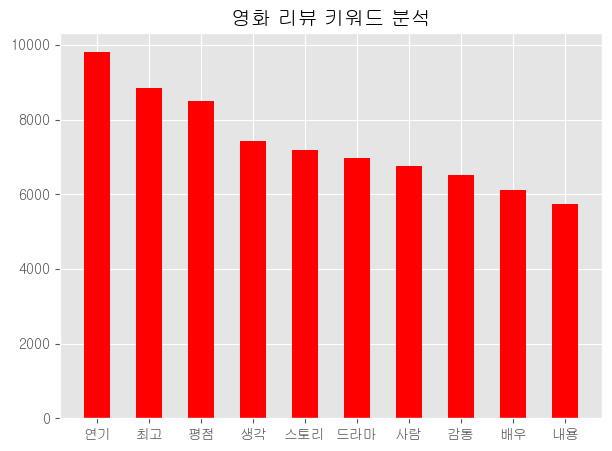

In [24]:
plt.figure(figsize=(7, 5))
plt.bar(top_c.keys(), top_c.values(), color='red', width=0.5)
plt.title('영화 리뷰 키워드 분석')
plt.show()

#### 3) 단어 빈도 시각화(워드클라우드; WordCloud)

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법이다.
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있다.
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화한다.
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있다.

##### ① 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib`와 `WordCloud`를 사용한다.

In [25]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(font_path='gulim', background_color='white', width=800, height=400, max_font_size=250, max_words=200)
gen = wc.generate_from_frequencies(c)

##### ② WordCloud를 이용해 객체를 생성해주고, `generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성한다.

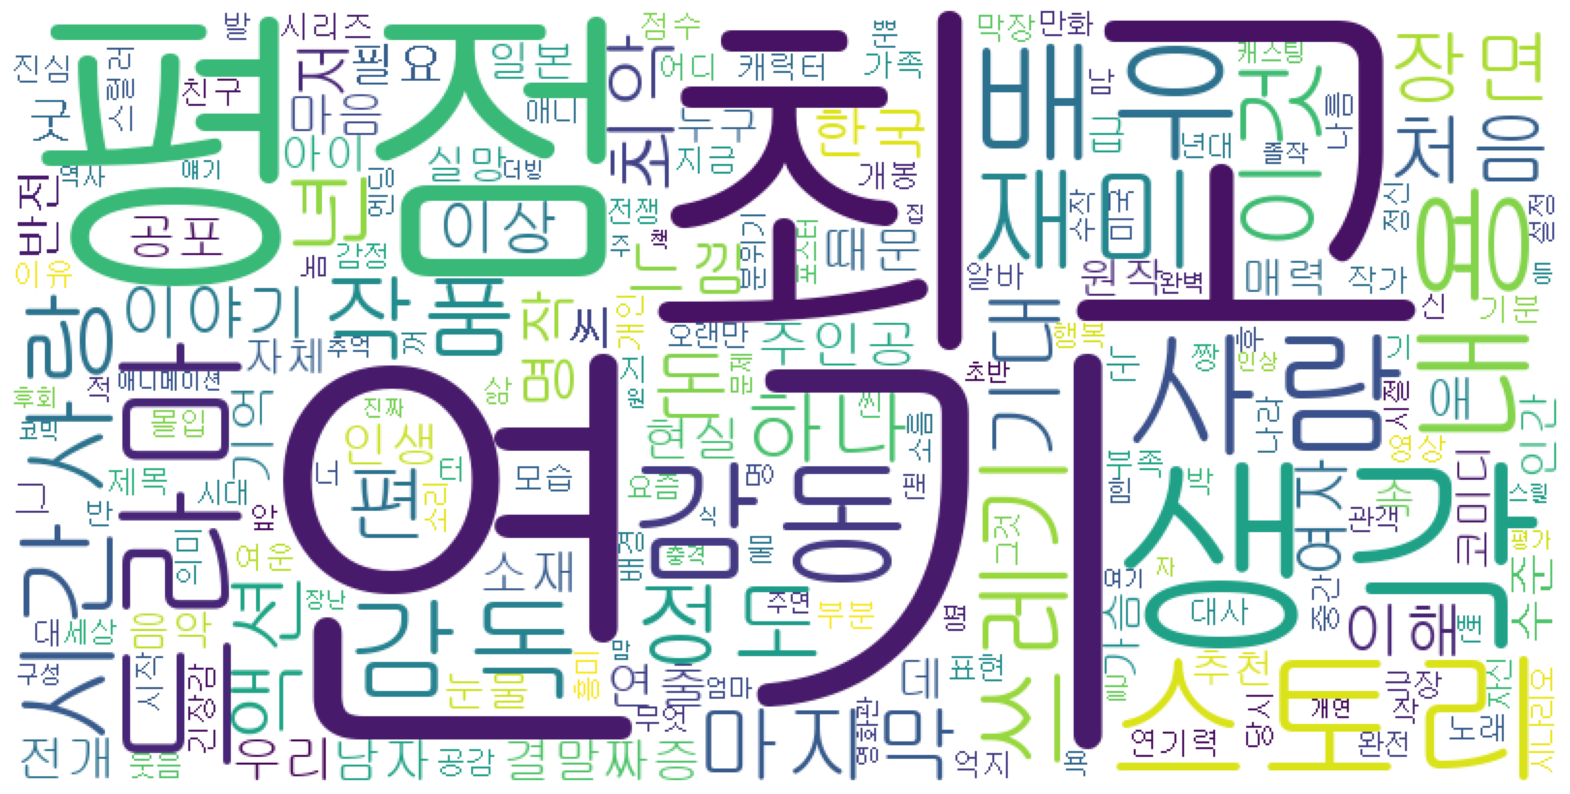

In [36]:
plt.figure(figsize=(20, 20))
plt.axis('off')
plt.imshow(gen);

##### ③ 배경 이미지에 워드클라우드 생성 - 배경 이미지를 배열로 변경하여 그 안에 들어가게 만드는 것

In [37]:
from PIL import Image
import numpy as np

img = Image.open('data_set/image.png')
img_array = np.array(img)

In [38]:
img_array

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

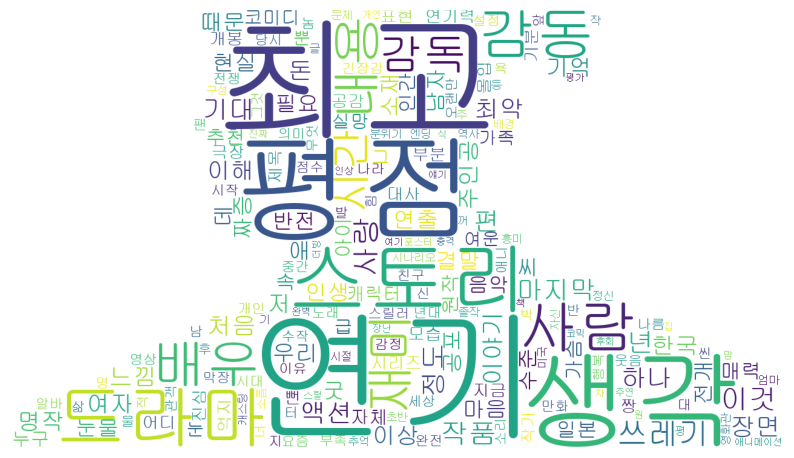

In [40]:
wc = WordCloud(font_path='gulim', background_color='white', width=800, height=400, max_font_size=250, max_words=200, mask=img_array)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(gen);

#### 4) 단어 빈도 시각화(squarify 트리맵)

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리이다.
* `squarify`를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타낸다.   